<b>Google Colab</b> <a href="https://colab.research.google.com/github/kirillzyusko/deeplearning/blob/master/8/lab.ipynb">link</a>

Authorize google + kaggle

In [1]:
from googleapiclient.discovery import build
import io, os
from googleapiclient.http import MediaIoBaseDownload
from google.colab import auth
auth.authenticate_user()
drive_service = build('drive', 'v3')
results = drive_service.files().list(
        q="name = 'kaggle.json'", fields="files(id)").execute()
kaggle_api_key = results.get('files', [])
filename = "/content/.kaggle/kaggle.json"
os.makedirs(os.path.dirname(filename), exist_ok=True)
request = drive_service.files().get_media(fileId=kaggle_api_key[0]['id'])
fh = io.FileIO(filename, 'wb')
downloader = MediaIoBaseDownload(fh, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print("Download %d%%." % int(status.progress() * 100))
os.chmod(filename, 600)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Download 100%.


Be sure, that we authorized and have an access to kaggle

In [2]:
%ls /content/.kaggle/

kaggle.json*


# **Part 1: Download dataset, display, load, capture metrics**

Download dataset:

In [3]:
!mkdir ~/.kaggle
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json
!kaggle datasets download robervalt/sunspots -p robervalt/sunspots

  0% 0.00/22.4k [00:00<?, ?B/s]
100% 22.4k/22.4k [00:00<00:00, 41.4MB/s]


Extract .zip:

In [8]:
!unzip robervalt/sunspots/sunspots.zip -d data

Archive:  robervalt/sunspots/sunspots.zip
  inflating: data/Sunspots.csv       


Load data:

In [16]:
import pandas as pd

DATA_PATH = './data/Sunspots.csv'

df = pd.read_csv(DATA_PATH)

df.head()

,Unnamed: 0,Date,Monthly Mean Total Sunspot Number
0,0,1749-01-31,96.7
1,1,1749-02-28,104.3
2,2,1749-03-31,116.7
3,3,1749-04-30,92.8
4,4,1749-05-31,141.7


Visualize it via timeline chart:

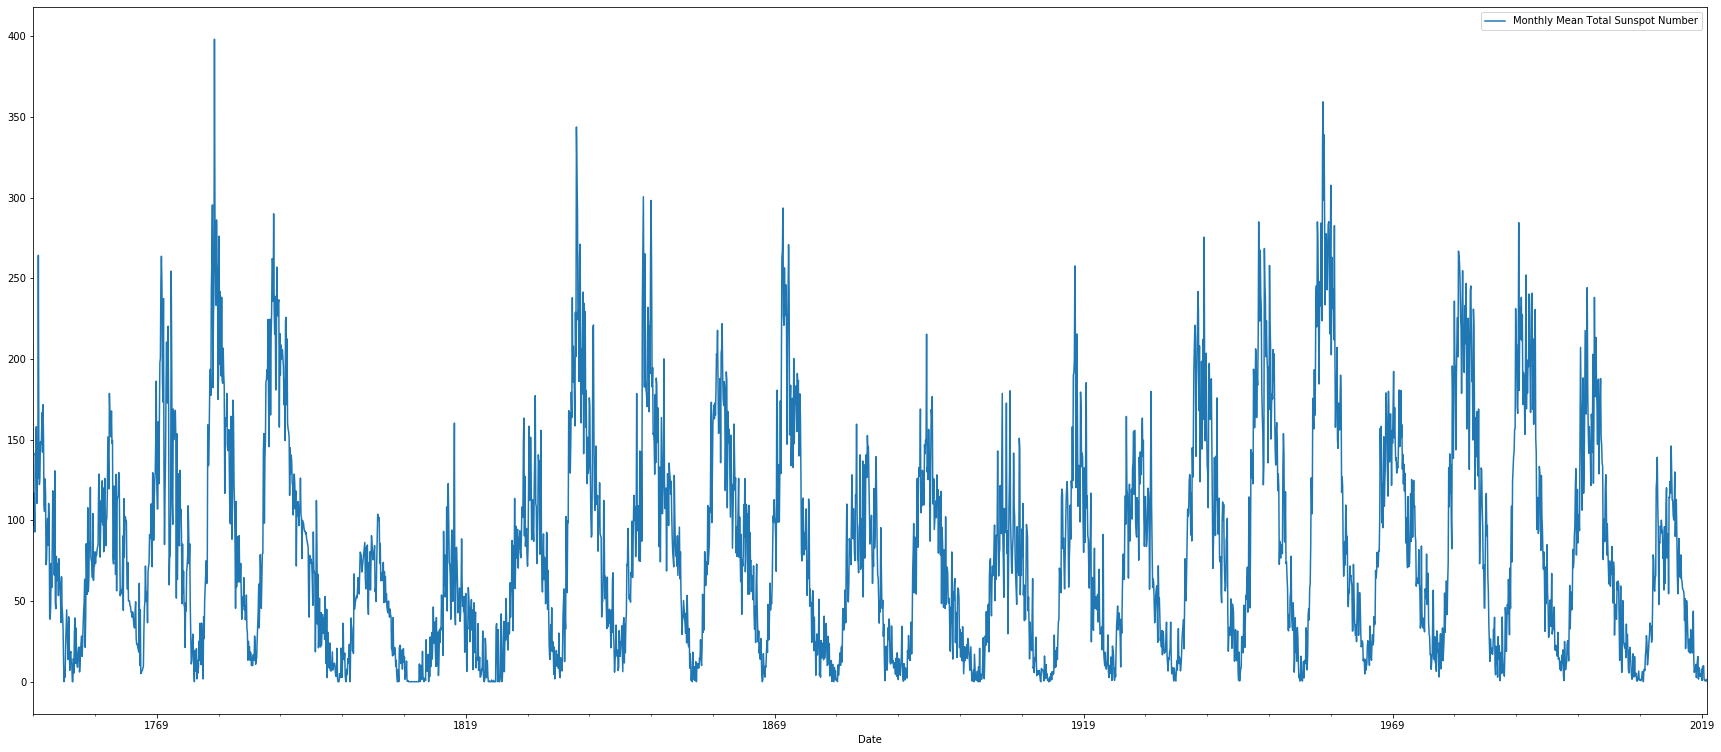

In [15]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [30, 13]

df['Date']= pd.to_datetime(df['Date'])

df.plot(x = 'Date', y = 'Monthly Mean Total Sunspot Number')

Capture *seasonality, trend, autocorrelation*:

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose

df2 = pd.read_csv(DATA_PATH, header=0, index_col=0)[:, 1:2]

result = seasonal_decompose(df2, model='multiplicative')
result.plot()
plt.show()

TypeError: ignored

# **Part 2: dataset splitting**

Use first 70% as train-data, and other 30% as test:

In [0]:
def ts_split(data,percentage=0.7):
    n = int(data.shape[0]*percentage)
    return data[:n],data[n+1:]

train, test = ts_split(df)

# **Part 3: ARIMA as a prediction model**

# **Part 4: RNN as a prediction model**

# **Part 5: final notes**